In [42]:
import pandas
import matplotlib.pyplot as plt
import glob
import numpy as np

In [50]:
input_data = pandas.read_csv('data/aileron_servo_and_transmitter_inputs.csv',
                             delimiter=',', nrows=11)
input_data

,Data Point (2m/s),Aileron Delection Servo signal,Ail Defl Sig Transmitter,Unnamed: 3,Alpha
0,1,1501,-0.4,NaN,0.0
1,2,1400,-19.4,NaN,NaN
2,3,1299,-40.2,NaN,NaN
3,4,1198,-59.4,NaN,NaN
4,5,1090,-80.7,NaN,NaN
5,6,992,-100.0,NaN,NaN
6,7,1608,20.5,NaN,NaN
7,8,1710,40.3,NaN,NaN
8,9,1808,59.4,NaN,NaN
9,10,1915,80.2,NaN,NaN


In [43]:
header = ['unknown', 'pitot', 'wind', 'aoa', 'drag', 'lift', 'pitch', 'roll', 'f0', 'f1', 'f2', 'f3']

data = []
for filename in glob.glob('data/*.txt'):
    data_i = pandas.read_csv(filename, delimiter='\t', header=None, names=header)
    data.append(data_i)

4.967630542504545 poly([0.01194488 0.07273465])
10.021725518372728 poly([-0.0101331   0.07488419])


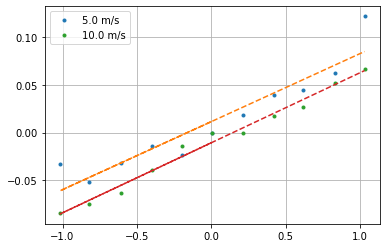

In [80]:
plt.figure()
for datai in data:
    rho = 1.225
    area = 0.0154838
    mean_wind = datai.wind.mean()
    if mean_wind < 3:
        continue
    q = 0.5*rho*datai.wind**2
    ail = (input_data['Aileron Delection Servo signal'] - 1500)/500
    C_roll = (datai.roll - datai.roll[0])/(q*area)
    
    poly = np.polynomial.Polynomial.fit(ail, C_roll, deg=1)
    y_fit = poly(ail)
    plt.plot(ail,
             C_roll, '.', label=str(np.round(mean_wind)) + ' m/s');
    plt.plot(ail, y_fit, '--')
    print(mean_wind, poly)
    #plt.plot(datai.roll, label=str(np.round(datai.wind.mean())) + ' m/s');
plt.legend()
plt.grid()